In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.python.ops.gen_batch_ops import Batch
from tensorflow.keras.regularizers import l1_l2

2024-10-18 19:35:10.987983: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-18 19:35:11.011448: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 19:35:11.011472: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 19:35:11.011498: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 19:35:11.016246: I tensorflow/core/platform/cpu_feature_g

**Running tests on the 13 latent features extracted without applying PCA**

In [2]:
X_13 = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/13_latent_X.csv')
y_13 = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Gleason_Scores.csv')

In [3]:
X_13.drop('Unnamed: 0', axis = 1, inplace = True)
y_13.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
X_13

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.099633,2.105071,4.861546,1.201062,1.031912,2.276838,0.0,1.958306,0.0,2.132879,4.927852,3.389273,0.0
1,4.394530,1.491024,4.633244,1.322756,1.280498,0.655486,0.0,1.165946,0.0,1.597877,3.526757,2.962063,0.0
2,2.846981,1.476024,4.533834,1.592871,1.536822,2.504034,0.0,1.904280,0.0,0.728638,3.857053,2.580591,0.0
3,3.067574,1.429004,5.242934,1.838206,1.546708,2.926856,0.0,1.900046,0.0,1.008405,4.477023,3.414979,0.0
4,3.214899,1.207983,4.899215,1.441559,2.005886,2.562202,0.0,1.749290,0.0,0.353448,2.871145,2.061730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1.944719,0.915589,4.315665,1.593531,1.536410,3.161861,0.0,1.590570,0.0,0.064122,2.831939,1.833311,0.0
286,3.352586,1.449966,5.232137,1.512709,1.478698,2.485846,0.0,1.839456,0.0,1.321241,4.266604,3.296337,0.0
287,2.647565,1.544407,4.800531,1.838045,1.290312,2.835737,0.0,1.859061,0.0,1.010842,4.215125,2.976325,0.0
288,3.485683,1.374207,5.253157,1.617933,1.357864,2.266077,0.0,1.591797,0.0,1.400602,4.281725,3.513130,0.0


In [5]:
y_13

,Gleason_Score
0,1
1,1
2,0
3,0
4,1
...,...
285,0
286,0
287,1
288,0


In [6]:
from sklearn.model_selection import train_test_split
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size = 0.33, random_state = 42)
X_test_13, X_val_13, y_test_13, y_val_13 = train_test_split(X_test_13, y_test_13, test_size = 0.33, random_state = 42)

In [7]:
X_train_13.shape, y_train_13.shape

((194, 13), (194, 1))

In [8]:
X_test_13.shape, y_test_13.shape

((64, 13), (64, 1))

In [9]:
#ANN
from tensorflow.keras.regularizers import l2
input_layer = Input(shape = (X_train_13.shape[1], ))
x = Dense(128, activation = 'relu')(input_layer)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(32, activation = 'relu')(x)
x = Dropout(0.1)(x)
output_layer = Dense(1, activation = 'sigmoid')(x)
ann_model = Model(input_layer, output_layer)
ann_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                             

2024-10-18 19:35:12.649137: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 19:35:12.689293: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 19:35:12.689449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
ann_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [11]:
#Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lrs = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.00001, patience = 10, min_lr = 1e-6)
es = EarlyStopping(monitor = 'val_loss', patience = 11)

In [12]:
history_1 = ann_model.fit(X_train_13, y_train_13, validation_data = (X_test_13, y_test_13), epochs = 100, callbacks = [lrs, es])

Epoch 1/100


2024-10-18 19:35:13.475627: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-18 19:35:14.334089: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x71970464b470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-18 19:35:14.334106: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-10-18 19:35:14.336597: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-18 19:35:14.343970: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-10-18 19:35:14.392083: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 [==============================] - 2s 19ms/step - loss: 0.8121 - accuracy: 0.4381 - val_loss: 0.7981 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7161 - accuracy: 0.4742 - val_loss: 0.7402 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6822 - accuracy: 0.5670 - val_loss: 0.7291 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6591 - accuracy: 0.5876 - val_loss: 0.7214 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6084 - accuracy: 0.6340 - val_loss: 0.7186 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6085 - accuracy: 0.6186 - val_loss: 0.7349 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6109 - accuracy: 0.6701 - 

**Using recursive feature elimination with feature wrapper**

In [13]:
#Testing out the random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rfc = RandomForestClassifier()
rfe = RFE(estimator = rfc, n_features_to_select = 5)
rfe.fit(X_train_13, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packag

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [14]:
print(f'Feature rank: {rfe.ranking_}')
print(f'Top features: {X_train_13.columns[rfe.support_]}')

Feature rank: [2 1 1 1 5 4 9 1 8 3 1 6 7]
Top features: Index(['1', '2', '3', '7', '10'], dtype='object')


In [15]:
X_train_rfe = rfe.transform(X_train_13)
X_val_rfe = rfe.transform(X_val_13)
X_test_rfe = rfe.transform(X_test_13)

In [16]:
X_train_rfe.shape

(194, 5)

In [17]:
rfc.fit(X_train_rfe, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [18]:
print(classification_report(y_val_13, rfc.predict(X_val_rfe)))

              precision    recall  f1-score   support

           0       0.62      0.33      0.43        15
           1       0.58      0.82      0.68        17

    accuracy                           0.59        32
   macro avg       0.60      0.58      0.56        32
weighted avg       0.60      0.59      0.57        32



In [19]:
#5 val acc-69%
#6 val acc-62%
#7 val acc-64%
#8 val acc-59%
#9 val acc-56%
#10 val acc-59%
#11 val acc-62%
#12 val acc-62%
#13 val acc-69%
#4  val acc-59%
#3  val acc-56%
#2  val acc-59%
#1  val acc-50%
#It is evident that Having 5 major features gives the same validation accuracy as having all 13 features


In [20]:
#Using only the features [2, 4, 7, 9 and 10]
X_train = X_train_13[['2', '4', '7', '9', '10']]
X_test = X_test_13[['2', '4', '7', '9', '10']]
X_val = X_val_13[['2', '4', '7', '9', '10']]

In [21]:
X_train

,2,4,7,9,10
184,6.135409,2.117820,1.037778,0.786942,2.570968
232,4.714121,1.919170,1.060741,0.250589,2.102296
38,4.632814,1.849033,2.286310,0.763380,4.068241
178,4.492625,1.444730,2.020933,0.753599,3.917394
170,4.592948,1.756269,2.191901,1.004540,4.086789
...,...,...,...,...,...
188,4.572306,1.342985,1.852130,0.694334,4.097106
71,5.278417,1.582679,1.534595,1.585902,3.956474
106,5.145191,1.242844,1.186918,1.740403,3.758870
270,4.074615,1.036103,1.995274,1.255049,4.405115


In [22]:
X_test

,2,4,7,9,10
15,5.312999,1.393442,1.789183,1.857458,4.724019
125,5.107173,0.998116,1.560883,1.827410,4.573071
180,4.455038,1.789094,2.087752,1.146413,3.831013
119,4.501893,2.008139,0.978763,0.640666,1.371113
165,4.874878,0.807901,1.396503,1.390021,4.632435
...,...,...,...,...,...
223,4.909243,1.732794,2.004662,1.277376,4.076252
10,4.582076,1.750962,1.647382,0.359396,2.785755
218,5.062508,1.842111,1.829901,0.631552,3.601160
97,5.285318,1.619579,1.544240,1.196564,3.550518


In [23]:
X_val

,2,4,7,9,10
67,5.116442,1.423162,1.366956,1.512774,3.580170
287,4.800531,1.290312,1.859061,1.010842,4.215125
68,6.079992,1.577895,0.978838,1.741999,3.666011
212,5.021482,1.693285,1.540695,0.928060,3.629627
117,5.349797,1.594493,1.625006,1.082490,3.930889
262,5.900863,1.550730,1.284157,0.600569,3.416085
93,6.746623,1.532774,0.890639,1.666480,3.982067
267,5.269382,1.356170,1.714668,1.697035,4.577945
84,3.188369,0.229596,1.189793,1.790315,3.711994
147,5.274270,1.397584,1.490384,1.475544,4.189394


In [24]:
#Testing out a neural network on these features
tf.random.set_seed(42)
#Model-1
nn_input_layer_1 = Input(shape = (X_train.shape[1], ))
x = Dense(1024, activation = 'relu')(nn_input_layer_1)
x = BatchNormalization(momentum = 0.8)(x)
x = Dense(512, activation = 'relu')(x)
x = BatchNormalization(momentum = 0.8)(x)
x = Dropout(0.1)(x)
x = Dense(256, activation = 'relu')(x)
x = BatchNormalization(momentum = 0.8)(x)
x = Dense(128, activation = 'relu')(x)
x = BatchNormalization(momentum = 0.8)(x)
nn_output_layer_1 = Dense(1, activation = 'sigmoid')(x)
nn_model_1 = Model(nn_input_layer_1, nn_output_layer_1) # This config yielded 73.71% training acc, 68.75% val acc in 23 epochs & 56% test acc
#Model-2
nn_input_layer_2 = Input(shape = (X_train.shape[1], ))
y = Dense(1024, activation = 'relu')(nn_input_layer_2)
y = BatchNormalization(momentum = 0.5)(y)
y = Dense(512, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.5)(y)
y = Dense(256, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.5)(y)
y = Dropout(0.1)(y)
y = Dense(128, activation = 'relu')(y)
y = Dropout(0.1)(y)
y = Dense(64, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.6)(y)
y = Dense(32, activation = 'relu')(y)
y = Dropout(0.1)(y)
y = BatchNormalization(momentum = 0.7)(y)
y = Dense(16, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.8)(y)
y = Dropout(0.1)(y)
y = Dense(16, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.9)(y)
y = Dense(16, activation = 'relu')(y)
nn_output_layer_2 = Dense(1, activation = 'sigmoid')(y)
nn_model_2 = Model(nn_input_layer_2, nn_output_layer_2) # This config yielded 60.31% train acc, 71.88% val acc in 39 epochs

nn_input_layer_3 = Input(shape = (X_train.shape[1], ))
z = Dense(1024, activation = 'relu')(nn_input_layer_3)
z = BatchNormalization(momentum = 0.8)(z)
z = Dense(512, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.8)(z)
z = Dense(256, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.8)(z)
z = Dropout(0.1)(z)
z = Dense(128, activation = 'relu')(z)
z = Dropout(0.1)(z)
z = Dense(64, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.8)(z)
z = Dense(32, activation = 'relu')(z)
z = Dropout(0.1)(z)
z = BatchNormalization(momentum = 0.9)(z)
z = Dense(16, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.99)(z)
z = Dropout(0.1)(z)
z = Dense(16, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.99)(z)
z = Dense(16, activation = 'relu')(z)
nn_output_layer_3 = Dense(1, activation = 'sigmoid')(z) 
nn_model_3 = Model(nn_input_layer_3, nn_output_layer_3) # This config gives the most stable ANN model train acc: 67.01%, val acc: 65.62% test acc: 64% 
'''nn_input_layer = Input(shape = (X_train.shape[1], ))
x = Dense(1024, kernel_regularizer = l2(0.01))(nn_input_layer)
x = BatchNormalization(momentum = 0.8)(x)
x = Activation('relu')(x)
x = Dense(512, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.8)(x)
x = Activation('relu')(x)
x = Dense(256, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.9)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = Dense(128, activation = 'relu', kernel_regularizer = l2(0.001))(x)
x = Dropout(0.1)(x)
x = Dense(64, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.9)(x)
x = Activation('relu')(x)
x = Dense(32, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.9)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.99)(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.99)(x)
x = Activation('relu')(x)
x = Dense(16, activation = 'relu')(x)
nn_output_layer = Dense(1, activation = 'sigmoid')(x) 
nn_model = Model(nn_input_layer, nn_output_layer)''' # Using this strategy and applying it to a simple model
nn_input_layer_4 = Input(shape = (X_train.shape[1], ))
a = Dense(256)(nn_input_layer_4)
a = BatchNormalization(momentum = 0.8)(a)
a = Activation('relu')(a)
a = Dense(128)(a)
a = BatchNormalization(momentum = 0.8)(a)
a = Activation('relu')(a)
a = Dense(64)(a)
a = BatchNormalization(momentum = 0.8)(a)
a = Activation('relu')(a)
a = Dense(32)(a)
a = BatchNormalization(momentum = 0.9)(a)
a = Activation('relu')(a)
a = Dense(16)(a)
a = BatchNormalization(momentum = 0.9)(a)
a = Activation('relu')(a)
a = Dense(16)(a)
a = BatchNormalization(momentum = 0.99)(a)
a = Activation('relu')(a)
a = Dense(16)(a)
a = BatchNormalization(momentum = 0.99)(a)
a = Activation('relu')(a)
nn_output_layer_4 = Dense(1, activation = 'sigmoid')(a)
nn_model_4 = Model(nn_input_layer_4, nn_output_layer_4) # 68% and 62.5%
nn_model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_29 (Dense)            (None, 256)               1536      
                                                                 
 batch_normalization_19 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_20 (Ba  (None, 128)               512       
 tchNormalization)                                         

In [25]:
nn_model_1.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
nn_model_2.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
nn_model_3.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
nn_model_4.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [26]:
history_nn_1 = nn_model_1.fit(X_train, y_train_13, validation_data = (X_val, y_val_13), epochs = 500)

Epoch 1/500
7/7 [==============================] - 2s 19ms/step - loss: 0.9445 - accuracy: 0.5567 - val_loss: 0.6861 - val_accuracy: 0.4375
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7466 - accuracy: 0.6134 - val_loss: 0.7118 - val_accuracy: 0.5938
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.6340 - val_loss: 0.8385 - val_accuracy: 0.5000
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6159 - accuracy: 0.7010 - val_loss: 0.6218 - val_accuracy: 0.6562
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.5933 - accuracy: 0.6701 - val_loss: 0.6269 - val_accuracy: 0.5625
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 0.5694 - accuracy: 0.7216 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6195 - accuracy: 0.6598 - val_loss: 0.6635 - val_accuracy: 0.5938
Epoch 8/500
7/7 [=========

In [27]:
history_nn_2 = nn_model_2.fit(X_train, y_train_13, validation_data = (X_val, y_val_13), epochs = 500)

Epoch 1/500
7/7 [==============================] - 2s 24ms/step - loss: 0.7358 - accuracy: 0.5103 - val_loss: 0.6733 - val_accuracy: 0.4688
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7203 - accuracy: 0.5155 - val_loss: 0.8189 - val_accuracy: 0.5938
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6793 - accuracy: 0.5825 - val_loss: 0.7615 - val_accuracy: 0.5000
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6364 - accuracy: 0.6186 - val_loss: 0.9746 - val_accuracy: 0.4375
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6523 - accuracy: 0.6340 - val_loss: 0.8112 - val_accuracy: 0.5312
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6421 - accuracy: 0.6289 - val_loss: 0.9162 - val_accuracy: 0.4688
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.5567 - val_loss: 0.8147 - val_accuracy: 0.6562
Epoch 8/500
7/7 [=========

In [28]:
history_nn_3 = nn_model_3.fit(X_train, y_train_13, validation_data = (X_val, y_val_13), epochs = 500)

Epoch 1/500
7/7 [==============================] - 2s 25ms/step - loss: 0.7078 - accuracy: 0.5309 - val_loss: 0.6921 - val_accuracy: 0.5312
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7076 - accuracy: 0.5722 - val_loss: 0.6839 - val_accuracy: 0.5312
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7218 - accuracy: 0.5206 - val_loss: 0.6697 - val_accuracy: 0.5938
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6863 - accuracy: 0.5979 - val_loss: 0.6335 - val_accuracy: 0.7500
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.6443 - val_loss: 0.6846 - val_accuracy: 0.5625
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6669 - accuracy: 0.5722 - val_loss: 0.6934 - val_accuracy: 0.5312
Epoch 7/500
7/7 [==============================] - 0s 10ms/step - loss: 0.6490 - accuracy: 0.6340 - val_loss: 0.7137 - val_accuracy: 0.4688
Epoch 8/500
7/7 [========

In [29]:
history_nn_4 = nn_model_4.fit(X_train, y_train_13, validation_data = (X_val, y_val_13), epochs = 500)

Epoch 1/500
7/7 [==============================] - 2s 25ms/step - loss: 0.7784 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.4688
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7019 - accuracy: 0.5412 - val_loss: 0.6735 - val_accuracy: 0.5312
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 0.6713 - accuracy: 0.5670 - val_loss: 0.6973 - val_accuracy: 0.5938
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6203 - accuracy: 0.6134 - val_loss: 0.7408 - val_accuracy: 0.4062
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6298 - accuracy: 0.6082 - val_loss: 0.7410 - val_accuracy: 0.4375
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6217 - accuracy: 0.6546 - val_loss: 0.7276 - val_accuracy: 0.5312
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6296 - accuracy: 0.6443 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 8/500
7/7 [========

In [30]:
print(classification_report(y_test_13, tf.round(nn_model_1.predict(X_test))))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.59      0.47      0.52        34
           1       0.51      0.63      0.57        30

    accuracy                           0.55        64
   macro avg       0.55      0.55      0.55        64
weighted avg       0.56      0.55      0.54        64



In [31]:
print(classification_report(y_test_13, tf.round(nn_model_2.predict(X_test))))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.53      0.24      0.33        34
           1       0.47      0.77      0.58        30

    accuracy                           0.48        64
   macro avg       0.50      0.50      0.45        64
weighted avg       0.50      0.48      0.45        64



In [32]:
print(classification_report(y_test_13, tf.round(nn_model_3.predict(X_test))))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.57      0.24      0.33        34
           1       0.48      0.80      0.60        30

    accuracy                           0.50        64
   macro avg       0.53      0.52      0.47        64
weighted avg       0.53      0.50      0.46        64



In [33]:
print(classification_report(y_test_13, tf.round(nn_model_4.predict(X_test))))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        34
           1       0.51      0.73      0.60        30

    accuracy                           0.55        64
   macro avg       0.57      0.56      0.54        64
weighted avg       0.57      0.55      0.53        64



In [34]:
#XGBoost classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train_13)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
print(classification_report(y_test_13, xgbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63        34
           1       0.60      0.70      0.65        30

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.65      0.64      0.64        64



In [36]:
#Hyperparameter tuning for xgboost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(estimator = xgbc, param_grid = param_grid, scoring = 'accuracy', n_jobs = -1, cv = 5)

In [37]:
gscv.fit(X_train, y_train_13)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [38]:
print(f'Best parameters for XGBoost classifier are: {gscv.best_params_}')

Best parameters for XGBoost classifier are: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}


In [39]:
xgb = XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 7, min_child_weight = 1, n_estimators = 50, subsample = 1.0)

In [40]:
xgb.fit(X_train, y_train_13)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
print(classification_report(y_test_13, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        34
           1       0.59      0.67      0.62        30

    accuracy                           0.62        64
   macro avg       0.63      0.63      0.62        64
weighted avg       0.63      0.62      0.62        64



In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [43]:
print(classification_report(y_test_13, tf.round(lr.predict(X_test))))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.54      0.63      0.58        30

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.58        64
weighted avg       0.58      0.58      0.58        64



In [44]:
y_pred_1 = nn_model_1.predict(X_test)
y_pred_2 = nn_model_2.predict(X_test)
y_pred_3 = nn_model_3.predict(X_test)
y_pred_4 = nn_model_4.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [45]:
y_pred_1

array([[0.52672213],
       [0.7195058 ],
       [0.2387893 ],
       [0.67149943],
       [0.7814665 ],
       [0.11397652],
       [0.93752676],
       [0.83587813],
       [0.6097973 ],
       [0.18350682],
       [0.86505896],
       [0.15219754],
       [0.7424114 ],
       [0.5314773 ],
       [0.25893432],
       [0.27618423],
       [0.9904723 ],
       [0.7303827 ],
       [0.16619042],
       [0.210759  ],
       [0.99958676],
       [0.8702121 ],
       [0.16729608],
       [0.6467249 ],
       [0.66649026],
       [0.25388607],
       [0.92025316],
       [0.32303196],
       [0.6041291 ],
       [0.85038143],
       [0.449969  ],
       [0.51286846],
       [0.36473498],
       [0.39197585],
       [0.5857658 ],
       [0.4124761 ],
       [0.27757013],
       [0.9814524 ],
       [0.5876185 ],
       [0.2905621 ],
       [0.7681543 ],
       [0.7589191 ],
       [0.3155034 ],
       [0.5972515 ],
       [0.46077368],
       [0.41552314],
       [0.9524999 ],
       [0.751

In [46]:
y_pred_2

array([[0.3993033 ],
       [0.6024165 ],
       [0.6347618 ],
       [0.9548467 ],
       [0.87148094],
       [0.41389513],
       [0.9791211 ],
       [0.6363289 ],
       [0.8379989 ],
       [0.7945605 ],
       [0.8729662 ],
       [0.62378025],
       [0.8063521 ],
       [0.8087156 ],
       [0.505011  ],
       [0.30429152],
       [0.99783057],
       [0.61914223],
       [0.7157777 ],
       [0.6435166 ],
       [0.99188316],
       [0.90269244],
       [0.3353817 ],
       [0.948375  ],
       [0.6631653 ],
       [0.459517  ],
       [0.91847897],
       [0.81655544],
       [0.5001466 ],
       [0.7951723 ],
       [0.4920307 ],
       [0.82931554],
       [0.73376083],
       [0.9416892 ],
       [0.62261105],
       [0.32108828],
       [0.14999549],
       [0.93861616],
       [0.6082302 ],
       [0.3943387 ],
       [0.64195114],
       [0.8724249 ],
       [0.47818664],
       [0.3055342 ],
       [0.62289333],
       [0.66682893],
       [0.9392134 ],
       [0.610

In [47]:
y_test_13

,Gleason_Score
15,0
125,0
180,0
119,1
165,1
...,...
223,1
10,1
218,0
97,1


In [48]:
y_pred_3

array([[0.39498022],
       [0.683159  ],
       [0.15220684],
       [0.6581995 ],
       [0.67316556],
       [0.43029067],
       [0.8401259 ],
       [0.67097384],
       [0.57936287],
       [0.2780525 ],
       [0.679816  ],
       [0.09025475],
       [0.56992877],
       [0.5530321 ],
       [0.4844869 ],
       [0.5497411 ],
       [0.40357795],
       [0.5662206 ],
       [0.5185107 ],
       [0.24518499],
       [0.9239862 ],
       [0.67742544],
       [0.5792442 ],
       [0.66304034],
       [0.5508063 ],
       [0.5514356 ],
       [0.76230997],
       [0.5390002 ],
       [0.5340934 ],
       [0.5479881 ],
       [0.5291087 ],
       [0.55847794],
       [0.63425547],
       [0.64135253],
       [0.6519667 ],
       [0.384345  ],
       [0.12413529],
       [0.74831337],
       [0.63253844],
       [0.56519884],
       [0.67356956],
       [0.6463951 ],
       [0.70907944],
       [0.5773909 ],
       [0.6469537 ],
       [0.6294681 ],
       [0.7119076 ],
       [0.592

In [49]:
y_pred_4

array([[0.71998584],
       [0.7458016 ],
       [0.20041974],
       [0.5515153 ],
       [0.75464994],
       [0.17570764],
       [0.7955382 ],
       [0.87487054],
       [0.67360413],
       [0.08510905],
       [0.6491561 ],
       [0.13880531],
       [0.80405366],
       [0.7126709 ],
       [0.35490307],
       [0.73231125],
       [0.86001486],
       [0.48908308],
       [0.05541071],
       [0.06551206],
       [0.7888996 ],
       [0.72010005],
       [0.7330688 ],
       [0.6033845 ],
       [0.49381608],
       [0.00172695],
       [0.8044463 ],
       [0.54013395],
       [0.636361  ],
       [0.7506392 ],
       [0.765234  ],
       [0.5869292 ],
       [0.58273846],
       [0.07203187],
       [0.533266  ],
       [0.75338876],
       [0.5162394 ],
       [0.8286166 ],
       [0.44428813],
       [0.1094772 ],
       [0.9014529 ],
       [0.4292234 ],
       [0.97360784],
       [0.60553753],
       [0.54920024],
       [0.7225561 ],
       [0.8104484 ],
       [0.623

In [50]:
results_dict = {'model_1': tf.squeeze(y_pred_1), 'model_2': tf.squeeze(y_pred_2), 'model_3': tf.squeeze(y_pred_3), 'model_4': tf.squeeze(y_pred_4)}

In [51]:
results_df = pd.DataFrame(results_dict)

In [52]:
results_df

,model_1,model_2,model_3,model_4
0,0.526722,0.399303,0.394980,0.719986
1,0.719506,0.602417,0.683159,0.745802
2,0.238789,0.634762,0.152207,0.200420
3,0.671499,0.954847,0.658199,0.551515
4,0.781466,0.871481,0.673166,0.754650
...,...,...,...,...
59,0.165641,0.650872,0.148493,0.157471
60,0.941246,0.927715,0.739700,0.760222
61,0.932069,0.856161,0.650129,0.728472
62,0.715507,0.812564,0.620806,0.641715


In [53]:
results_df['model_1'] = results_df['model_1'].apply(lambda x: 1 if x > 0.5 else 0)
results_df['model_2'] = results_df['model_2'].apply(lambda x: 1 if x > 0.5 else 0)
results_df['model_3'] = results_df['model_3'].apply(lambda x: 1 if x > 0.5 else 0)
results_df['model_4'] = results_df['model_4'].apply(lambda x: 1 if x > 0.5 else 0)

In [54]:
results_df

,model_1,model_2,model_3,model_4
0,1,0,0,1
1,1,1,1,1
2,0,1,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
59,0,1,0,0
60,1,1,1,1
61,1,1,1,1
62,1,1,1,1


In [55]:
results_df['pred_label'] = results_df.apply(lambda x: x.mode()[0], axis = 1)

In [56]:
results_df

,model_1,model_2,model_3,model_4,pred_label
0,1,0,0,1,0
1,1,1,1,1,1
2,0,1,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
59,0,1,0,0,0
60,1,1,1,1,1
61,1,1,1,1,1
62,1,1,1,1,1


In [57]:
results_df['True_label'] = tf.squeeze(y_test_13)

In [58]:
results_df

,model_1,model_2,model_3,model_4,pred_label,True_label
0,1,0,0,1,0,0
1,1,1,1,1,1,0
2,0,1,0,0,0,0
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
59,0,1,0,0,0,1
60,1,1,1,1,1,1
61,1,1,1,1,1,0
62,1,1,1,1,1,1


In [59]:
print(classification_report(results_df['True_label'], results_df['pred_label']))

              precision    recall  f1-score   support

           0       0.58      0.41      0.48        34
           1       0.50      0.67      0.57        30

    accuracy                           0.53        64
   macro avg       0.54      0.54      0.53        64
weighted avg       0.54      0.53      0.52        64



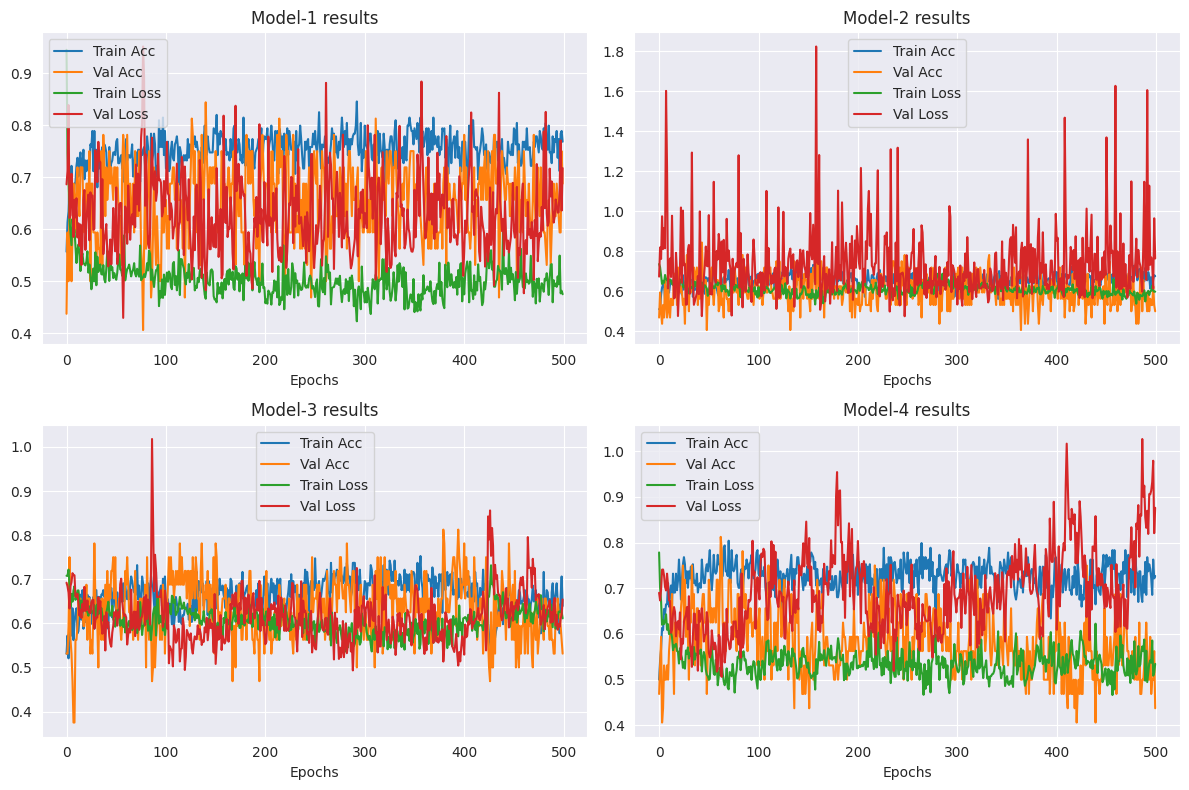

In [62]:
#Training a classifier on this dataframe
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
plt.plot(history_nn_1.history['accuracy'], label= 'Train Acc')
plt.plot(history_nn_1.history['val_accuracy'], label = 'Val Acc')
plt.plot(history_nn_1.history['loss'], label= 'Train Loss')
plt.plot(history_nn_1.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('Model-1 results')
plt.tight_layout()

plt.subplot(2, 2, 2)
plt.plot(history_nn_2.history['accuracy'], label= 'Train Acc')
plt.plot(history_nn_2.history['val_accuracy'], label = 'Val Acc')
plt.plot(history_nn_2.history['loss'], label= 'Train Loss')
plt.plot(history_nn_2.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('Model-2 results')
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.plot(history_nn_3.history['accuracy'], label= 'Train Acc')
plt.plot(history_nn_3.history['val_accuracy'], label = 'Val Acc')
plt.plot(history_nn_3.history['loss'], label= 'Train Loss')
plt.plot(history_nn_3.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('Model-3 results')
plt.tight_layout()

plt.subplot(2, 2, 4)
plt.plot(history_nn_4.history['accuracy'], label= 'Train Acc')
plt.plot(history_nn_4.history['val_accuracy'], label = 'Val Acc')
plt.plot(history_nn_4.history['loss'], label= 'Train Loss')
plt.plot(history_nn_4.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('Model-4 results')
plt.tight_layout()